<h1 style="color:#ff5733; text-align:center; font-size:45px;">🚀 Hello! I'm <b style="color:#33A1FF;">Yahya Ahmad</b> 👋</h1>

<p style="font-size:22px; text-align:center; color:#444;">
I'm a beginner passionate about <b style="color:#FF914D;">technology</b>, <b style="color:#FF914D;">machine learning</b>, and <b style="color:#FF914D;">Python programming</b>. 
I'm excited to learn and grow in the world of <b style="color:#33A1FF;">data science</b> and <b style="color:#33A1FF;">AI</b>. 🚀
</p>

<hr style="border:2px solid #ff5733; width:80%;">

<h2 style="color:#33A1FF; font-size:30px;">🎯 My Interests:</h2>

<ul style="font-size:22px; color:#444;">
    <li><b style="color:#FF914D;">Programming</b>: Python </li>
    <li><b style="color:#FF914D;">Machine Learning</b>: Exploring PyTorch and TensorFlow</li>
    <li><b style="color:#FF914D;">Deep Learning AI</b>: Neural Networks & Computer Vision</li>
</ul>

<hr style="border:2px solid #ff5733; width:80%;">

<h2 style="color:#33A1FF; font-size:30px;">📬 Let's Connect!</h2>

<ul style="font-size:22px; color:#444;">
    <li>📧 <b>Email</b>: <a href="mailto:Ya0280780@gmail.com" style="color:#FF914D;">Ya0280780@gmail.com</a></li>
    <li>🔗 <b>LinkedIn</b>: <a href="https://www.linkedin.com/in/yahya-ahmad-8538312b1/" style="color:#FF914D;">Yahya Ahmad on LinkedIn</a></li>
    <li>💻 <b>GitHub</b>: <a href="https://github.com/Yahyaahmad09/Courses" style="color:#FF914D;">My GitHub Repository</a></li>
</ul>

<hr style="border:2px solid #ff5733; width:80%;">


<h1 style="color:#FF5733; text-align:center; font-size:38px;">🎯 Hyperparameter Tuning with Optuna</h1>

<hr style="border:2px solid #FF5733;">

<h2 style="color:#33A1FF; font-size:28px;">🔥 Introduction</h2>
<p style="font-size:18px;">
Hyperparameter tuning is a crucial step in optimizing deep learning models. Instead of manually trying different hyperparameters, we use <b style="color:#FF5733;">Optuna</b>, a powerful and efficient <b>hyperparameter optimization framework</b>. It helps us automatically search for the best parameters, leading to improved model performance.
</p>

<h2 style="color:#33A1FF; font-size:28px;">📌 Why Optuna?</h2>
<ul style="font-size:18px;">
    <li>✅ <b style="color:#FF914D;">Automated search:</b> Finds the best hyperparameters without manual effort.</li>
    <li>✅ <b style="color:#FF914D;">Efficient pruning:</b> Stops unpromising trials early to save time.</li>
    <li>✅ <b style="color:#FF914D;">Easy integration:</b> Works well with PyTorch and Scikit-Learn.</li>
    <li>✅ <b style="color:#FF914D;">Supports various optimization strategies:</b> TPE (Tree-structured Parzen Estimator), Grid Search, and Random Search.</li>
</ul>

<h2 style="color:#33A1FF; font-size:28px;">⚙️ Hyperparameters We Will Tune</h2>
<p style="font-size:18px;">In this notebook, we will use Optuna to optimize the hyperparameters of our <b style="color:#D63384;">Artificial Neural Network (ANN)</b> for <b>Fashion MNIST</b> and <b>Breast Cancer Classification</b>.</p>

<h3 style="color:#FF5733; font-size:22px;">🔢 Learning Rate</h3>
<p style="font-size:18px;">Controls how much to adjust weights during training. A small value may lead to slow learning, while a large value may cause instability.</p>

<h3 style="color:#FF5733; font-size:22px;">🏗️ Number of Hidden Layers</h3>
<p style="font-size:18px;">Determines the model's depth and ability to learn complex patterns.</p>

<h3 style="color:#FF5733; font-size:22px;">🔢 Number of Neurons per Layer</h3>
<p style="font-size:18px;">Defines the capacity of each layer to capture features.</p>

<h3 style="color:#FF5733; font-size:22px;">📦 Batch Size</h3>
<p style="font-size:18px;">Influences training speed and model performance.</p>

<h3 style="color:#FF5733; font-size:22px;">⚙️ Optimizer Type</h3>
<p style="font-size:18px;">We will experiment with different optimizers such as <b>SGD, Adam, and RMSprop</b> to find the most effective one.</p>

<h2 style="color:#33A1FF; font-size:28px;">🛠️ Optimization Process</h2>
<p style="font-size:18px;">
<b>Steps to Tune:</b>
<ul style="font-size:18px;">
    <li>Define the objective function.</li>
    <li>Set the search space for each hyperparameter.</li>
    <li>Use <b style="color:#FF5733;">Optuna</b> to explore the best combinations.</li>
    <li>Train the ANN and evaluate performance.</li>
    <li>Analyze the results and select the optimal configuration.</li>
</ul>
</p>

<h2 style="color:#33A1FF; font-size:28px;">🎯 Conclusion</h2>
<p style="font-size:18px;">
Hyperparameter tuning with Optuna enables us to efficiently optimize our model for better accuracy and performance. Through an intelligent search strategy, we can identify the most effective configuration without extensive manual effort.
</p>

<hr style="border:1px solid #ccc;">
<p style="text-align:center; font-size:18px;">
🔗 <a href="https://optuna.org/" style="color:#FF5733; text-decoration:none; font-weight:bold;">Learn More About Optuna</a>
</p>


In [89]:
# import the necessray Labraries
import pandas as pd 
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [90]:
# set the random seed for reproducbility
torch.manual_seed(42)

In [91]:
df = pd.read_csv('fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [92]:
df.shape

(6000, 785)

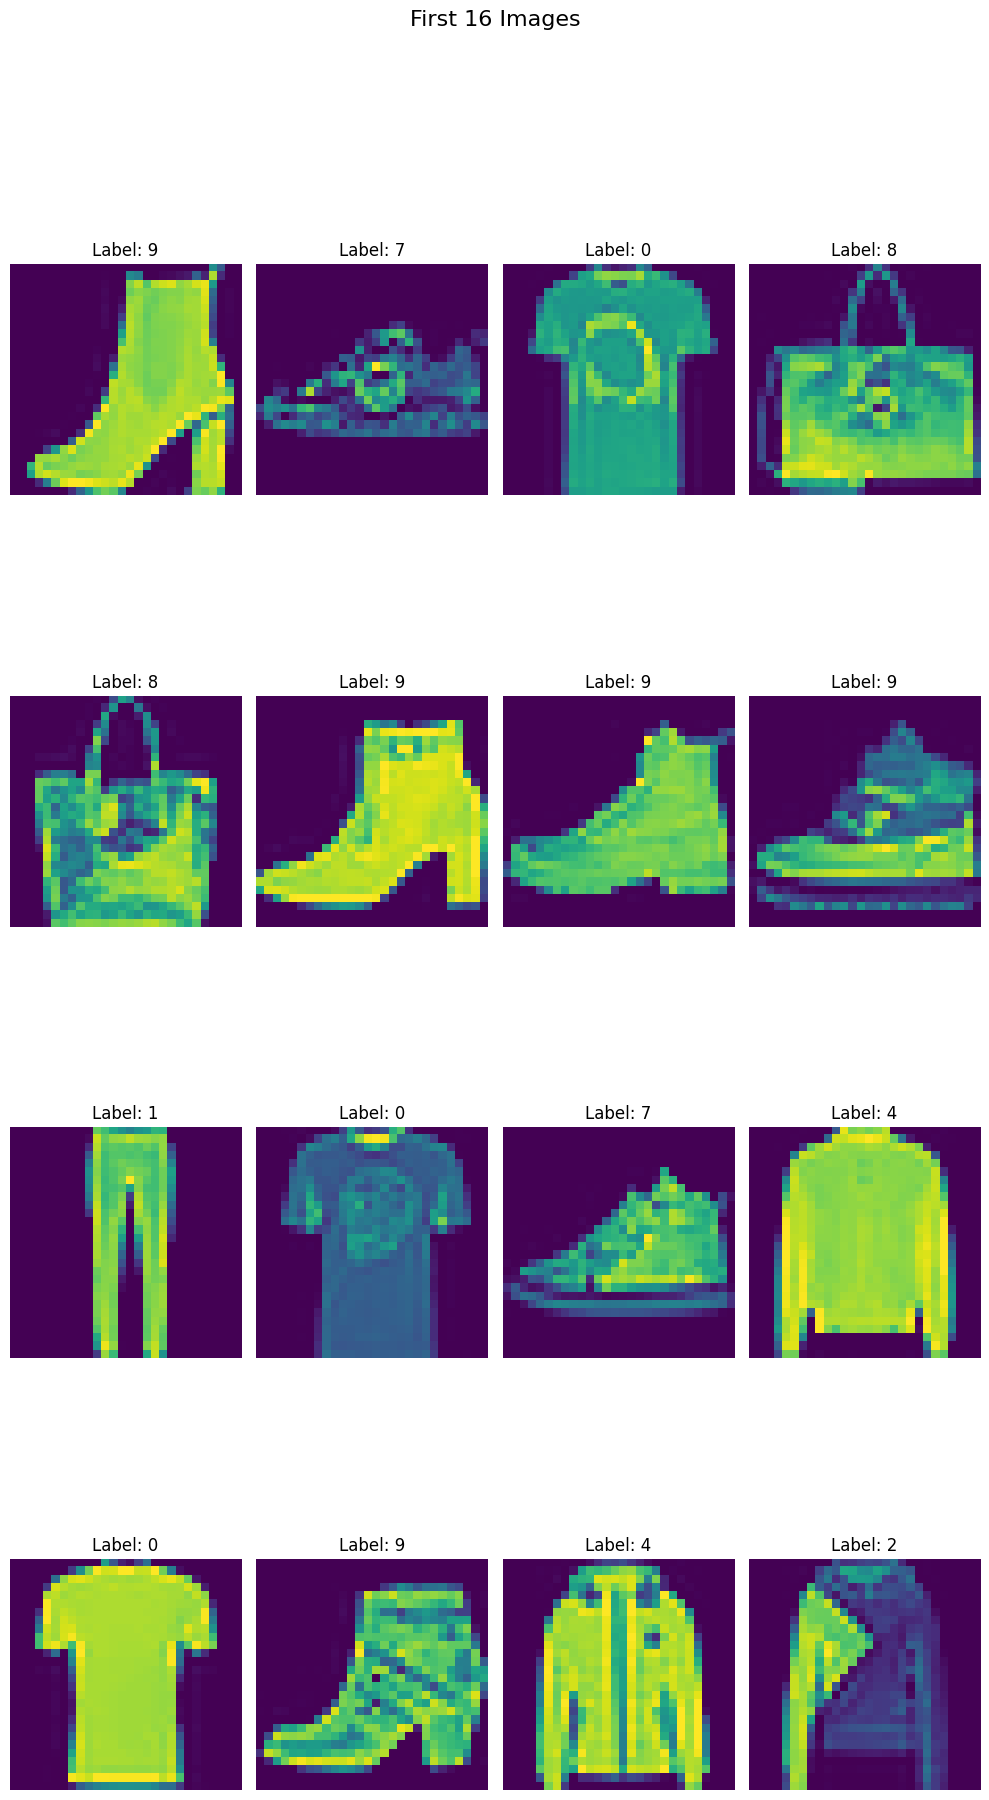

In [93]:
# create a 4 by 4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10,20))
fig.suptitle('First 16 Images', fontsize=16)
# now plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)    # Reshape to 28 by 28 
    ax.imshow(img)    # display in  grayscale
    ax.axis('off')    # remove axis from the clenner book 
    ax.set_title(f'Label: {df.iloc[i,0]}')    # show the label

plt.tight_layout(rect=[0,0,1,0.96])    # adjuct layout to fit the title
plt.show()

In [94]:
# train test split
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Normalize only features (not labels)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Ensure labels remain integers (do not scale)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
# creata a CustomDataSet class 
class CustomDataSet(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype = torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        return self.features[index], self.labels[index]

In [98]:
# create an object to Train and test the dataset
train_dataset = CustomDataSet(X_train, y_train)
test_dataset = CustomDataSet(X_test, y_test)



In [ ]:
# create an object of Train and Test dataloader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [99]:
# Define a Class
class MyNN(nn.Module):
    def __init__(self, input_dim, output_dim, num_hidden_layers, neuron_per_layer):
        super().__init__()

        layers = []
        for i in range(num_hidden_layers):
            layers.append(nn.Linear(input_dim, neuron_per_layer))   # 
            layers.append(nn.BatchNorm1d(neuron_per_layer))  # for Optimization using BatchNorm1d
            layers.append(nn.ReLU())    # Activation function using ReLU
            layers.append(nn.Dropout(0.3))  # for optimization using Dropout 
            input_dim = neuron_per_layer  # Update input for the next layer

        layers.append(nn.Linear(neuron_per_layer, output_dim))  # Output layer

        self.model = nn.Sequential(*layers)  # Register layers in nn.Sequential

    def forward(self, x):
        return self.model(x)  # Forward pass


<h2 style="color:#33A1FF; font-size:28px;">Hyperparameter Tuning:</h2>
<h3 style="color:#FF5733; font-size:20px;">1️⃣ Number of Hidden Layers</h3>
<h3 style="color:#FF5733; font-size:20px;">2️⃣ Neurons Per Layer</h3>
<h3 style="color:#FF5733; font-size:20px;">3️⃣ Epochs</h3>
<h3 style="color:#FF5733; font-size:20px;">4️⃣ Learning Rate</h3>
<h3 style="color:#FF5733; font-size:20px;">5️⃣ Dropout Rate</h3>
<h3 style="color:#FF5733; font-size:20px;">6️⃣ Batch Size</h3>
<h3 style="color:#FF5733; font-size:20px;">7️⃣ Optimizer Name</h3>
<h3 style="color:#FF5733; font-size:20px;">8️⃣ Weight Decay</h3>


In [104]:
# objective function
def objective(trail):
    # Next hyperparameter values from the search space
    num_hidden_layers = trail.suggest_int('num_hidden_layers', 1, 5)
    neuron_per_layer = trail.suggest_int('neuron_per_layer', 8, 128, step=8)
    epochs = trail.suggest_int('epochs', 10, 50, step=10 )
    learning_rate = trail.suggest_float('learning_rate', 1e-5, 1e-1, log=True)
    dropout_rate = trail.suggest_float('dropout_rate', 0.1,0.5, step=0.1) 
    batch_size = trail.suggest_categorical('batch_size', [16, 32, 64, 128])
    optimizer_name = trail.suggest_categorical('optimizer_name', ['Adam', 'SGD', 'RMSprop'])
    weight_decay = trail.suggest_float('weight_dacy',1e-5, 1e-3, log=True)
    
    
    # create an object of Train and Test dataloader
    train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)
    
    # model initialize 
    input_dim = 784
    output_dim = 10

    model = MyNN(input_dim, output_dim, num_hidden_layers, neuron_per_layer)
    
    # parameters initialize
    learning_rate = 0.01
    epochs = 25
    
    #optimizer selection 
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr = 0.1, weight_decay = weight_decay)

    if optimizer_name == 'Adam':
        optim.Adam(model.parameters(), lr = learning_rate, weight_decay = weight_decay)
    elif optimizer_name == 'SGD':
        optim.SGD(model.parameters(), lr = learning_rate, weight_decay = weight_decay)
    else:
        optim.RMSprop(model.parameters(), lr = learning_rate, weight_decay = weight_decay)
    
    
    # training loop 
    for epoch in range(epochs):
    
        total_epoch_loss = 0
        for batch_features, batch_labels in train_dataloader:
    
            # forward pass 
            y_pred = model(batch_features)
    
            # loss calculation 
            Loss = loss_fn(y_pred, batch_labels)
    
            # backward pass 
            optimizer.zero_grad()
      
            Loss.backward()
    
            optimizer.step()

    # Evaluation

    model.eval() 

    # set to eval model  
    model.eval()
    
    len(test_dataloader)
    
    # Evaluation
    total = 0 
    correct = 0 
    
    with torch.no_grad(): 
        for batch_features, batch_labels in test_dataloader: 
            output = model(batch_features)
            
            # Extract class predictions (indices)
            _, predicted = torch.max(output, 1)  # Correct way
            
            total += batch_labels.shape[0]
            correct += (predicted == batch_labels).sum().item()
        
         # Compute accuracy
        accuracy = correct / total  
    
    return accuracy 

In [76]:
# install optuna
!pip install optuna

In [105]:
import optuna

In [106]:
study = optuna.create_study(direction='maximize')

[I 2025-03-08 08:00:28,622] A new study created in memory with name: no-name-65e57db5-dd7f-45c7-8614-2dcbaa2a7af5


In [107]:
study.optimize(objective, n_trials=5)

[I 2025-03-08 08:00:57,984] Trial 0 finished with value: 0.8333333333333334 and parameters: {'num_hidden_layers': 3, 'neuron_per_layer': 128, 'epochs': 50, 'learning_rate': 3.6389881639466e-05, 'dropout_rate': 0.1, 'batch_size': 16, 'optimizer_name': 'RMSprop', 'weight_dacy': 1.86399252302208e-05}. Best is trial 0 with value: 0.8333333333333334.
[I 2025-03-08 08:01:14,659] Trial 1 finished with value: 0.8233333333333334 and parameters: {'num_hidden_layers': 1, 'neuron_per_layer': 80, 'epochs': 30, 'learning_rate': 8.772220866777484e-05, 'dropout_rate': 0.2, 'batch_size': 32, 'optimizer_name': 'SGD', 'weight_dacy': 1.0608910931855487e-05}. Best is trial 0 with value: 0.8333333333333334.
[I 2025-03-08 08:01:35,721] Trial 2 finished with value: 0.8458333333333333 and parameters: {'num_hidden_layers': 2, 'neuron_per_layer': 120, 'epochs': 50, 'learning_rate': 1.5978400045696685e-05, 'dropout_rate': 0.4, 'batch_size': 128, 'optimizer_name': 'SGD', 'weight_dacy': 0.00011456174177187697}. Bes

In [108]:
study.best_value

0.8458333333333333

In [109]:
study.best_params

{'num_hidden_layers': 2,
 'neuron_per_layer': 120,
 'epochs': 50,
 'learning_rate': 1.5978400045696685e-05,
 'dropout_rate': 0.4,
 'batch_size': 128,
 'optimizer_name': 'SGD',
 'weight_dacy': 0.00011456174177187697}